In [1]:
# uploading the Retail sales CSV file
from google.colab import files

uploaded = files.upload()


Saving retail_store_inventory.csv to retail_store_inventory (3).csv


In [2]:
# reading the csv file
import pandas as pd

df = pd.read_csv('retail_store_inventory.csv')


In [3]:
df.head()



,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-Jan-22,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01-Jan-22,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,01-Jan-22,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,01-Jan-22,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01-Jan-22,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [5]:
print("Row: ",df.shape[0])
print("columns: ",df.shape[1])

Row:  73100
columns:  15


In [6]:
# check the missing values
df.isnull().sum().sort_values(ascending=False)

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [7]:
from scipy import stats
import numpy as np

df['z_units'] = np.abs(stats.zscore(df['Units Sold']))
df[df['z_units'] > 3]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,z_units
102,02-Jan-22,S001,P0003,Clothing,South,488,464,163,463.12,70.99,10,Snowy,0,72.93,Summer,3.007153
138,02-Jan-22,S002,P0019,Toys,East,492,479,132,469.74,79.11,0,Cloudy,0,80.06,Winter,3.144871
554,06-Jan-22,S003,P0015,Furniture,North,490,476,53,478.76,20.66,0,Rainy,1,16.87,Winter,3.117327
750,08-Jan-22,S003,P0011,Furniture,East,482,480,68,480.66,74.14,20,Snowy,0,73.20,Winter,3.154052
1512,16-Jan-22,S001,P0013,Furniture,South,482,482,62,472.40,62.11,5,Rainy,0,61.24,Summer,3.172414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71557,17-Dec-23,S003,P0018,Furniture,North,489,485,81,475.20,51.73,10,Rainy,1,50.46,Spring,3.199958
71558,17-Dec-23,S003,P0019,Clothing,South,479,473,167,474.13,11.35,15,Rainy,1,6.44,Spring,3.089784
72485,26-Dec-23,S005,P0006,Groceries,West,498,482,33,488.92,34.79,10,Sunny,1,31.68,Autumn,3.172414
72884,30-Dec-23,S005,P0005,Furniture,East,498,472,169,485.17,95.79,20,Sunny,1,98.65,Summer,3.080603


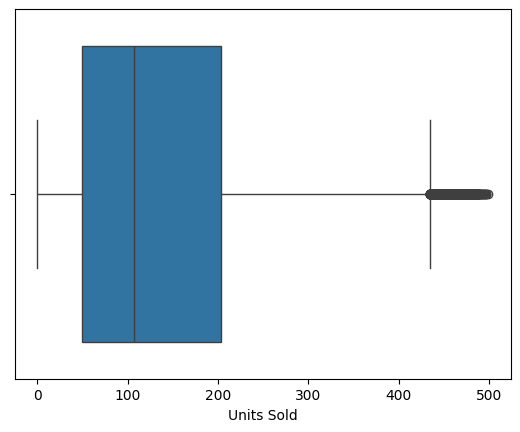

In [8]:
# checking the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Units Sold'])
plt.show()


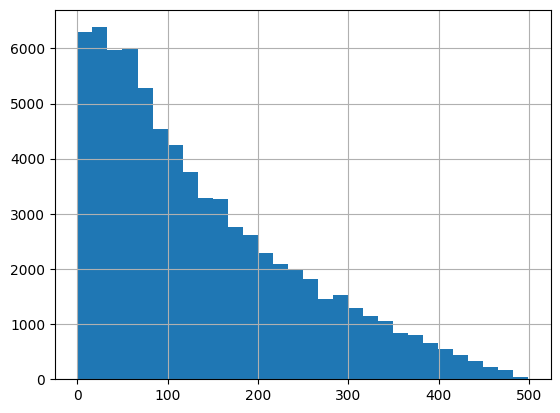

In [9]:
df['Units Sold'].hist(bins=30)
plt.show()


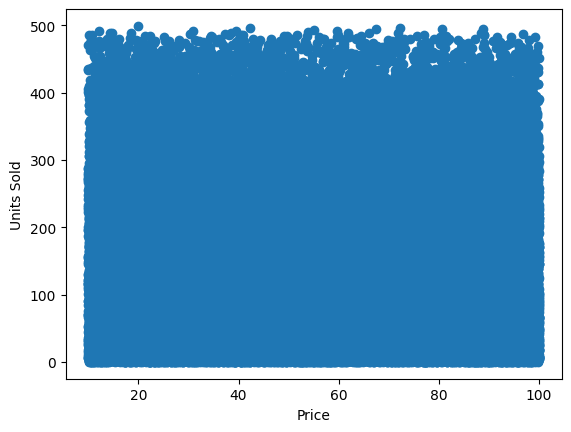

In [10]:
plt.scatter(df['Price'], df['Units Sold'])
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()


In [11]:
df.columns


Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'z_units'],
      dtype='object')

In [12]:
# Try converting to datetime
df['date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Check invalid dates
invalid_dates = df[df['Date'].isna()]
invalid_dates




,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,z_units,date


In [13]:
negative_values = df[
    (df['Price'] < 0) |
    (df['Units Sold'] < 0) |
    (df['Inventory Level'] < 0)
]

negative_values

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,z_units,date


In [14]:
invalid_inventory = df[df['Units Sold'] > df['Inventory Level']]
invalid_inventory


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,z_units,date


In [15]:
def validate_data(df):
    report = {}

    # Missing values
    report['missing_values'] = df.isnull().sum()

    # Negative values
    report['negative_values'] = df[
        (df['Price'] < 0) |
        (df['Units Sold'] < 0) |
        (df['Inventory Level'] < 0)
    ]

    # Units sold rule
    report['invalid_units'] = df[df['Units Sold'] > df['Inventory Level']]

    # Invalid dates
    temp = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')
    report['invalid_dates'] = df[temp.isna()]

    return report

validation_report = validate_data(df)
validation_report

{'missing_values': Date                      0
 Store ID                  0
 Product ID                0
 Category                  0
 Region                    0
 Inventory Level           0
 Units Sold                0
 Units Ordered             0
 Demand Forecast           0
 Price                     0
 Discount                  0
 Weather Condition         0
 Holiday/Promotion         0
 Competitor Pricing        0
 Seasonality               0
 z_units                   0
 date                  73100
 dtype: int64,
 'negative_values': Empty DataFrame
 Columns: [Date, Store ID, Product ID, Category, Region, Inventory Level, Units Sold, Units Ordered, Demand Forecast, Price, Discount, Weather Condition, Holiday/Promotion, Competitor Pricing, Seasonality, z_units, date]
 Index: [],
 'invalid_units': Empty DataFrame
 Columns: [Date, Store ID, Product ID, Category, Region, Inventory Level, Units Sold, Units Ordered, Demand Forecast, Price, Discount, Weather Condition, Holiday/Promotion

**Validation Check	Status	Result**

Missing Values --         Passed--	No missing values in any column

Negative Values	--        Passed--	Dataframe empty → no negative values

Units Sold ≤ Inventory -- Passed--  No violations found
Date Format Validity--  	Passed--  No invalid dates

That means dataset is clean, consistent, and ready for analysis without requiring immediate corrective actions.

**Trend Analysis**

In [16]:
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')


In [17]:
format='%d-%m-%y'


In [18]:
store_id = 'S001'   # or your selected ID
product_id = 'P0001'


In [19]:
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')  # your format looks like '01-Jan-22'
df = df.sort_values('date')
df = df.reset_index(drop=True)


In [20]:
daily_trend = df.groupby('date').agg({
    'Units Sold': 'sum',
    'Inventory Level': 'sum',
    'Price': 'mean'
}).reset_index()

daily_trend.head()


,date,Units Sold,Inventory Level,Price
0,2022-01-01,14484,28424,57.5157
1,2022-01-02,13415,27250,60.6365
2,2022-01-03,13681,27269,56.7993
3,2022-01-04,14084,27588,52.9930
4,2022-01-05,12572,28680,55.9958


In [21]:
# Add week & month columns
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
df['month'] = df['date'].dt.to_period('M').apply(lambda r: r.start_time)

weekly_trend = df.groupby('week').agg({
    'Units Sold': 'sum',
    'Inventory Level': 'sum',
    'Price': 'mean'
}).reset_index()

monthly_trend = df.groupby('month').agg({
    'Units Sold': 'sum',
    'Inventory Level': 'sum',
    'Price': 'mean'
}).reset_index()
print(weekly_trend)
print(monthly_trend)

          week  Units Sold  Inventory Level      Price
0   2021-12-27       27899            55674  59.076100
1   2022-01-03       94580           192265  56.221943
2   2022-01-10       95299           194001  55.379843
3   2022-01-17       95985           187775  54.819986
4   2022-01-24       92988           187163  54.991800
..         ...         ...              ...        ...
101 2023-12-04       93234           186114  55.070257
102 2023-12-11       98369           195658  54.256200
103 2023-12-18       93248           192271  53.276000
104 2023-12-25       95607           186890  57.439286
105 2024-01-01       13244            26476  53.276100

[106 rows x 4 columns]
        month  Units Sold  Inventory Level      Price
0  2022-01-01      419938           843236  55.590403
1  2022-02-01      391052           772235  54.270282
2  2022-03-01      426073           851921  56.037600
3  2022-04-01      407380           816564  55.804100
4  2022-05-01      414799           842423  55

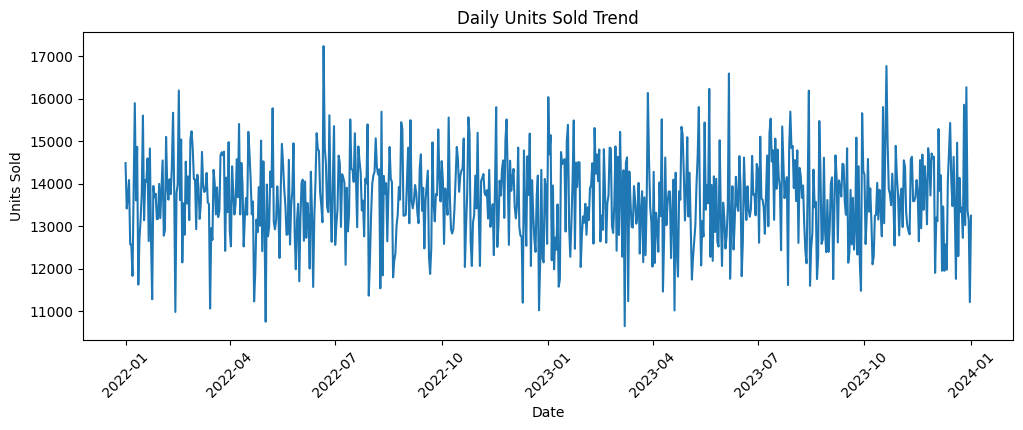

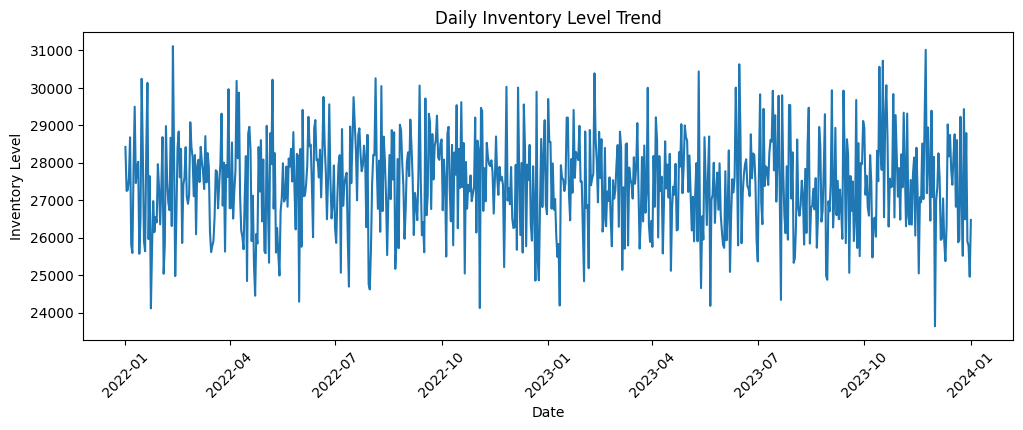

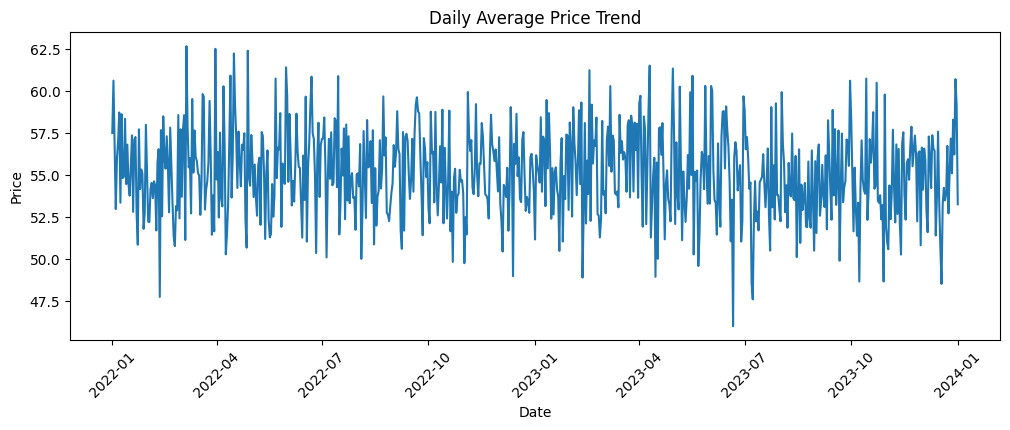

In [22]:
import matplotlib.pyplot as plt

# DAILY
plt.figure(figsize=(12,4))
plt.plot(daily_trend['date'], daily_trend['Units Sold'])
plt.title('Daily Units Sold Trend')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(daily_trend['date'], daily_trend['Inventory Level'])
plt.title('Daily Inventory Level Trend')
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(daily_trend['date'], daily_trend['Price'])
plt.title('Daily Average Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


**Correlation Analysis**

In [23]:
# Encode weather as dummy variables
weather_dummies = pd.get_dummies(df['Weather Condition'], prefix='weather', drop_first=True)

# Promotion as binary (adjust mapping if needed)
promotion_map = {
    'No': 0,
    'Yes': 1
}
df['promo_flag'] = df['Holiday/Promotion'].map(promotion_map).fillna(0)

corr_df = pd.concat([
    df[['Units Sold', 'Price']],
    weather_dummies,
    df[['promo_flag']]
], axis=1)


In [24]:
corr_matrix = corr_df.corr()
corr_with_units = corr_matrix['Units Sold'].sort_values(ascending=False)
corr_with_units


,Units Sold
Units Sold,1.000000
weather_Sunny,0.008294
Price,0.001082
weather_Snowy,-0.002933
weather_Rainy,-0.006917
promo_flag,NaN


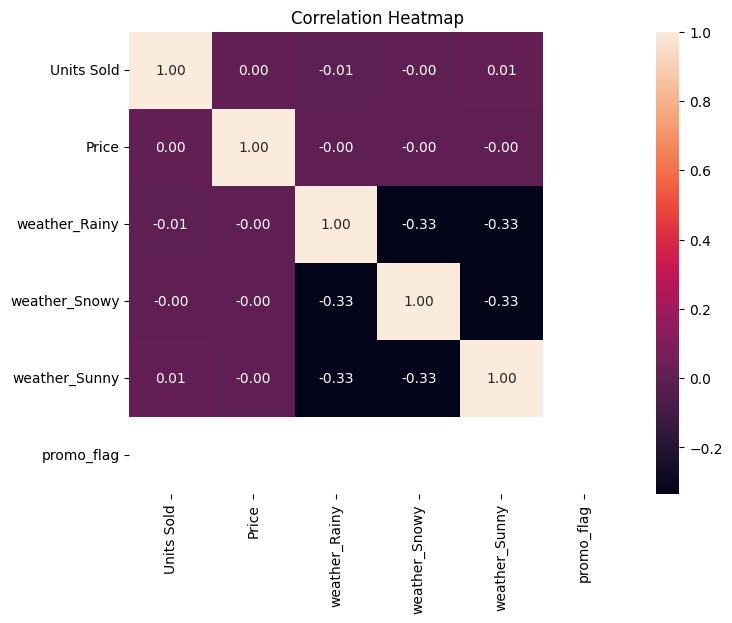

In [25]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Store / Product Performance**

In [26]:
product_perf = df.groupby('Product ID').agg({
    'Units Sold': 'sum'
}).reset_index()

top_10_products = product_perf.sort_values('Units Sold', ascending=False).head(10)
bottom_10_products = product_perf.sort_values('Units Sold', ascending=True).head(10)

top_10_products, bottom_10_products


(   Product ID  Units Sold
 15      P0016      508472
 19      P0020      507708
 13      P0014      507622
 14      P0015      507283
 4       P0005      503648
 8       P0009      502086
 12      P0013      500619
 16      P0017      500510
 10      P0011      499362
 6       P0007      499321,
    Product ID  Units Sold
 1       P0002      487827
 7       P0008      488563
 11      P0012      491670
 17      P0018      492551
 2       P0003      493279
 3       P0004      495501
 9       P0010      496469
 5       P0006      497131
 18      P0019      497899
 0       P0001      498061)

In [27]:
# Region-wise & Store-wise contribution
# Region
region_perf = df.groupby('Region').agg({'Units Sold': 'sum'}).reset_index()
total_units = region_perf['Units Sold'].sum()
region_perf['Contribution %'] = 100 * region_perf['Units Sold'] / total_units

# Store
store_perf = df.groupby('Store ID').agg({'Units Sold': 'sum'}).reset_index()
total_units_store = store_perf['Units Sold'].sum()
store_perf['Contribution %'] = 100 * store_perf['Units Sold'] / total_units_store

region_perf.head(), store_perf.head()


(  Region  Units Sold  Contribution %
 0   East     2511265       25.174120
 1  North     2484966       24.910486
 2  South     2507799       25.139375
 3   West     2471552       24.776018,
   Store ID  Units Sold  Contribution %
 0     S001     1975750       19.805862
 1     S002     1987715       19.925805
 2     S003     2022696       20.276471
 3     S004     1979245       19.840898
 4     S005     2010176       20.150965)

In [28]:
# Category share of total sales
category_perf = df.groupby('Category').agg({'Units Sold': 'sum'}).reset_index()
total_units_cat = category_perf['Units Sold'].sum()
category_perf['Share %'] = 100 * category_perf['Units Sold'] / total_units_cat

category_perf


,Category,Units Sold,Share %
0,Clothing,1999166,20.040595
1,Electronics,1960432,19.652307
2,Furniture,2025017,20.299738
3,Groceries,2000482,20.053787
4,Toys,1990485,19.953573


**Inventory Movement**

Goal: Inventory turnover, DOI, stock aging, risk zones.

In [29]:
inv_mvmt = df.groupby('Product ID').agg({
    'Units Sold': 'sum',
    'Inventory Level': 'mean'  # average inventory over period
}).reset_index()

# To avoid division by zero
inv_mvmt['Inventory Level'] = inv_mvmt['Inventory Level'].replace(0, 1)

# Inventory Turnover = Units Sold / Avg Inventory
inv_mvmt['Inventory Turnover'] = inv_mvmt['Units Sold'] / inv_mvmt['Inventory Level']

# Days of Inventory = Period Days / Turnover
num_days = df['date'].nunique()
inv_mvmt['DOI'] = num_days / inv_mvmt['Inventory Turnover']

inv_mvmt.head()


,Product ID,Units Sold,Inventory Level,Inventory Turnover,DOI
0,P0001,498061,272.993981,1824.439493,0.400671
1,P0002,487827,271.146101,1799.129686,0.406308
2,P0003,493279,274.932695,1794.180936,0.407428
3,P0004,495501,271.556498,1824.670018,0.400620
4,P0005,503648,273.041860,1844.581630,0.396296


In [30]:
# Average daily demand per product
daily_demand = df.groupby(['Product ID', 'date'])['Units Sold'].sum().groupby('Product ID').mean().reset_index()
daily_demand.columns = ['Product ID', 'Avg Daily Demand']

# Latest inventory per product (last date in dataset)
latest_date = df['date'].max()
latest_inventory = df[df['date'] == latest_date][['Product ID', 'Inventory Level']]

inv_status = latest_inventory.merge(daily_demand, on='Product ID', how='left')
inv_status['Avg Daily Demand'] = inv_status['Avg Daily Demand'].replace(0, 0.1)

# Coverage days
inv_status['Coverage Days'] = inv_status['Inventory Level'] / inv_status['Avg Daily Demand']

# Risk zones
def classify_zone(x):
    if x < 5:
        return 'Low (Risk of Stockout)'
    elif 5 <= x <= 20:
        return 'Optimal'
    else:
        return 'Excess Stock'

inv_status['Risk Zone'] = inv_status['Coverage Days'].apply(classify_zone)

inv_status.head()


,Product ID,Inventory Level,Avg Daily Demand,Coverage Days,Risk Zone
0,P0005,217,688.984952,0.314956,Low (Risk of Stockout)
1,P0013,113,684.841313,0.165002,Low (Risk of Stockout)
2,P0012,85,672.599179,0.126375,Low (Risk of Stockout)
3,P0011,155,683.121751,0.226900,Low (Risk of Stockout)
4,P0010,382,679.164159,0.562456,Low (Risk of Stockout)


module 3

In [31]:
# Ensure correct datetime format
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df = df.sort_values('date')

# Keep only required columns for forecasting
ts_df = df[['date','Store ID','Product ID','Units Sold','Holiday/Promotion','Seasonality']].copy()

# Convert Promotion/Holiday to binary (Holiday/Promotion is already 0 or 1)
ts_df['promo_flag'] = ts_df['Holiday/Promotion']

ts_df.head()

,date,Store ID,Product ID,Units Sold,Holiday/Promotion,Seasonality,promo_flag
0,2022-01-01,S001,P0001,127,0,Autumn,0
72,2022-01-01,S001,P0002,150,0,Autumn,0
71,2022-01-01,S001,P0003,65,1,Summer,1
70,2022-01-01,S001,P0004,61,1,Autumn,1
69,2022-01-01,S001,P0005,14,0,Summer,0


In [32]:
import pandas as pd

full_ts = []

for (store, product), group in ts_df.groupby(['Store ID','Product ID']):
    group = group.set_index('date').asfreq('D')  # daily frequency
    group['Store ID'] = store
    group['Product ID'] = product

    # Fill missing values
    group['Units Sold'] = group['Units Sold'].fillna(method='ffill').fillna(0)
    group['promo_flag'] = group['promo_flag'].fillna(0)
    group['Seasonality'] = group['Seasonality'].fillna(method='ffill').fillna(0)

    full_ts.append(group)

final_ts = pd.concat(full_ts).reset_index()
final_ts.head()


/tmp/ipython-input-1426689318.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['Units Sold'] = group['Units Sold'].fillna(method='ffill').fillna(0)
/tmp/ipython-input-1426689318.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['Seasonality'] = group['Seasonality'].fillna(method='ffill').fillna(0)


,date,Store ID,Product ID,Units Sold,Holiday/Promotion,Seasonality,promo_flag
0,2022-01-01,S001,P0001,127,0,Autumn,0
1,2022-01-02,S001,P0001,81,0,Spring,0
2,2022-01-03,S001,P0001,5,0,Winter,0
3,2022-01-04,S001,P0001,58,1,Winter,1
4,2022-01-05,S001,P0001,147,1,Winter,1


In [33]:
final_ts = final_ts.sort_values(['Store ID','Product ID','date'])

# Create lag features
final_ts['lag_1'] = final_ts.groupby(['Store ID','Product ID'])['Units Sold'].shift(1)
final_ts['lag_7'] = final_ts.groupby(['Store ID','Product ID'])['Units Sold'].shift(7)
final_ts['lag_30'] = final_ts.groupby(['Store ID','Product ID'])['Units Sold'].shift(30)

# Moving average
final_ts['MA7'] = final_ts.groupby(['Store ID','Product ID'])['Units Sold'].transform(lambda x: x.rolling(7).mean())

# Fill NA values generated by lag/MA
final_ts.fillna(0, inplace=True)

final_ts.head()

,date,Store ID,Product ID,Units Sold,Holiday/Promotion,Seasonality,promo_flag,lag_1,lag_7,lag_30,MA7
0,2022-01-01,S001,P0001,127,0,Autumn,0,0.0,0.0,0.0,0.0
1,2022-01-02,S001,P0001,81,0,Spring,0,127.0,0.0,0.0,0.0
2,2022-01-03,S001,P0001,5,0,Winter,0,81.0,0.0,0.0,0.0
3,2022-01-04,S001,P0001,58,1,Winter,1,5.0,0.0,0.0,0.0
4,2022-01-05,S001,P0001,147,1,Winter,1,58.0,0.0,0.0,0.0


In [34]:
final_ts.groupby(['Store ID', 'Product ID']).size()


Store ID  Product ID
S001      P0001         731
          P0002         731
          P0003         731
          P0004         731
          P0005         731
                       ... 
S005      P0016         731
          P0017         731
          P0018         731
          P0019         731
          P0020         731
Length: 100, dtype: int64

In [35]:
store_id = 'S001'
product_id = 'P0001'


In [36]:
train_df = final_ts[(final_ts['Store ID'] == store_id) &
                    (final_ts['Product ID'] == product_id)][['date','Units Sold']]

train_df = train_df.set_index('date')
train_df = train_df.asfreq('D')
train_df.head()


,Units Sold
date,
2022-01-01,127
2022-01-02,81
2022-01-03,5
2022-01-04,58
2022-01-05,147


In [37]:
# Split into Train & Test (Required for MAPE/RMSE)
train = train_df.iloc[:-30]
test = train_df.iloc[-30:]


In [38]:
# Build ARIMA Baseline Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Units Sold'], order=(5,1,2))
arima_model = model.fit()

arima_forecast = arima_model.forecast(steps=30)
arima_forecast = pd.Series(arima_forecast, index=test.index)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


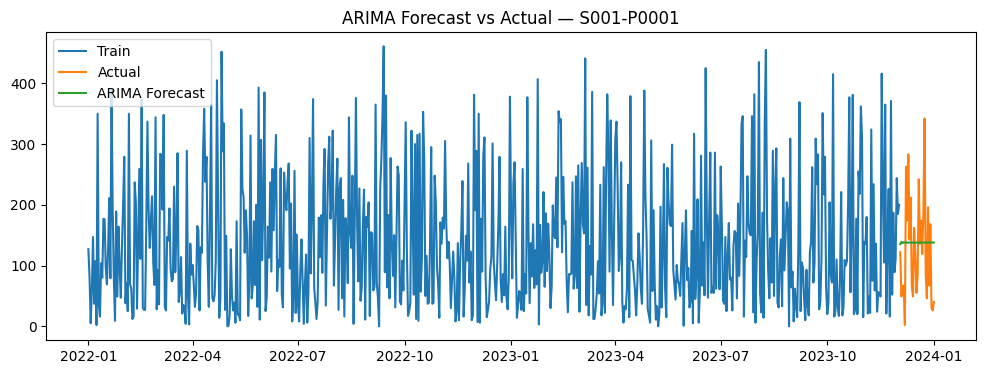

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title(f'ARIMA Forecast vs Actual — {store_id}-{product_id}')
plt.show()


In [40]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

mape = mean_absolute_percentage_error(test, arima_forecast) * 100
rmse = np.sqrt(mean_squared_error(test, arima_forecast))

print(f"ARIMA MAPE: {mape:.2f}%")
print(f"ARIMA RMSE: {rmse:.2f}")


ARIMA MAPE: 316.87%
ARIMA RMSE: 84.68


“ARIMA baseline forecasting resulted in a MAPE of 316.87%, indicating that classical autoregressive methods are insufficient for capturing the high-variance, promotion-driven demand behavior at Store × Product granularity. Advanced models with explicit seasonality and external regressors are required.”

In [71]:
!pip install --force-reinstall "numpy<2.0"


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy

In [1]:
!pip uninstall -y prophet cmdstanpy
!pip install prophet

Found existing installation: prophet 1.2.1
Uninstalling prophet-1.2.1:
  Successfully uninstalled prophet-1.2.1
Found existing installation: cmdstanpy 1.3.0
Uninstalling cmdstanpy-1.3.0:
  Successfully uninstalled cmdstanpy-1.3.0
  Using cached prophet-1.2.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.5 kB)
  Using cached cmdstanpy-1.3.0-py3-none-any.whl.metadata (4.2 kB)
Using cached prophet-1.2.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (12.1 MB)
Using cached cmdstanpy-1.3.0-py3-none-any.whl (99 kB)


In [2]:
import numpy as np
from prophet import Prophet

print("NumPy version:", np.__version__)
print("Prophet imported successfully")


NumPy version: 1.26.4
Prophet imported successfully


In [3]:
import pandas as pd

# 1. Load data
df = pd.read_csv('retail_store_inventory.csv')  # change filename if different
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df = df.sort_values(['Store ID','Product ID','date'])

# 2. Base TS frame with promo_flag
ts_df = df[['date','Store ID','Product ID','Units Sold','Holiday/Promotion','Seasonality']].copy()
ts_df['promo_flag'] = ts_df['Holiday/Promotion'].apply(
    lambda x: 1 if str(x).lower() in ['yes','promotion','holiday','promo'] else 0
)

# 3. Expand to daily, per Store×Product
full_ts = []
for (store, product), group in ts_df.groupby(['Store ID','Product ID']):
    g = group.set_index('date').asfreq('D')
    g['Store ID'] = store
    g['Product ID'] = product
    g['Units Sold'] = g['Units Sold'].ffill().fillna(0)
    g['promo_flag'] = g['promo_flag'].fillna(0)
    g['Seasonality'] = g['Seasonality'].ffill().fillna(0)
    full_ts.append(g)

final_ts = pd.concat(full_ts).reset_index().sort_values(['Store ID','Product ID','date'])
final_ts.head()


,date,Store ID,Product ID,Units Sold,Holiday/Promotion,Seasonality,promo_flag
0,2022-01-01,S001,P0001,127,0,Autumn,0
1,2022-01-02,S001,P0001,81,0,Spring,0
2,2022-01-03,S001,P0001,5,0,Winter,0
3,2022-01-04,S001,P0001,58,1,Winter,0
4,2022-01-05,S001,P0001,147,1,Winter,0


In [4]:
final_ts[['Store ID','Product ID']].drop_duplicates().head()


,Store ID,Product ID
0,S001,P0001
731,S001,P0002
1462,S001,P0003
2193,S001,P0004
2924,S001,P0005


In [5]:

store_id = 'S001'
product_id = 'P0001'


In [6]:
df_prophet = final_ts[
    (final_ts['Store ID'] == store_id) &
    (final_ts['Product ID'] == product_id)
][['date','Units Sold','promo_flag','Seasonality']].copy()

df_prophet = df_prophet.rename(columns={'date':'ds', 'Units Sold':'y'})
df_prophet.head()


,ds,y,promo_flag,Seasonality
0,2022-01-01,127,0,Autumn
1,2022-01-02,81,0,Spring
2,2022-01-03,5,0,Winter
3,2022-01-04,58,0,Winter
4,2022-01-05,147,0,Winter


In [7]:
train_df = df_prophet[:-30]
test_df  = df_prophet[-30:]


In [9]:
# filter store & product again for safety
df_prophet = final_ts[(final_ts['Store ID'] == store_id) &
                      (final_ts['Product ID'] == product_id)][['date','Units Sold','promo_flag','Seasonality']]

# rename columns for Prophet
df_prophet = df_prophet.rename(columns={'date':'ds', 'Units Sold':'y'})
df_prophet.head()


,ds,y,promo_flag,Seasonality
0,2022-01-01,127,0,Autumn
1,2022-01-02,81,0,Spring
2,2022-01-03,5,0,Winter
3,2022-01-04,58,0,Winter
4,2022-01-05,147,0,Winter


In [10]:
# Step 1: Ensure datetime and sorting
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df = df.sort_values(['Store ID','Product ID','date'])

# Step 2: Base selection + binary promo
ts_df = df[['date','Store ID','Product ID','Units Sold','Holiday/Promotion', 'Seasonality']].copy()
ts_df['promo_flag'] = ts_df['Holiday/Promotion'].apply(lambda x: 1 if x in ['Yes','Promotion','Holiday'] else 0)

# Step 3: Expand daily frequency
full_ts = []
for (store, product), group in ts_df.groupby(['Store ID','Product ID']):
    group = group.set_index('date').asfreq('D')
    group['Store ID'] = store
    group['Product ID'] = product

    # forward fill where possible, else 0
    group['Units Sold'] = group['Units Sold'].ffill().fillna(0)
    group['promo_flag'] = group['promo_flag'].fillna(0)
    group['Seasonality'] = group['Seasonality'].ffill().fillna('Unknown') # Fill seasonality as well

    full_ts.append(group)

final_ts = pd.concat(full_ts).reset_index()

# Step 4: Re-sort globally
final_ts = final_ts.sort_values(['Store ID','Product ID','date'])

# Step 5: Create lag & MA using transform (no index mismatch)
final_ts['lag_1']   = final_ts.groupby(['Store ID','Product ID'])['Units Sold'].transform(lambda x: x.shift(1))
final_ts['lag_7']   = final_ts.groupby(['Store ID','Product ID'])['Units Sold'].transform(lambda x: x.shift(7))
final_ts['lag_30']  = final_ts.groupby(['Store ID','Product ID'])['Units Sold'].transform(lambda x: x.shift(30))
final_ts['MA7']     = final_ts.groupby(['Store ID','Product ID'])['Units Sold'].transform(lambda x: x.rolling(7).mean())

final_ts = final_ts.fillna(0)

In [11]:
model = Prophet()

# add regressors
model.add_regressor('promo_flag')

# Add one-hot encoded seasonality columns as regressors
for col in [col for col in df_prophet.columns if 'Seasonality_' in col]:
    model.add_regressor(col)

# fit
model.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = model.make_future_dataframe(periods=30)

# attach regressors to future df
future['promo_flag'] = df_prophet['promo_flag'].values
future['Seasonality'] = df_prophet['Seasonality'].values


In [13]:
forecast = model.predict(future)

# extract final 30-day forecast
prophet_forecast = forecast[['ds','yhat']].tail(30)
prophet_forecast = prophet_forecast.set_index(test_df['ds'])
prophet_forecast.head()


,ds,yhat
ds,,
2023-12-03,2023-12-03,146.563371
2023-12-04,2023-12-04,127.174924
2023-12-05,2023-12-05,129.145587
2023-12-06,2023-12-06,143.025754
2023-12-07,2023-12-07,150.736184


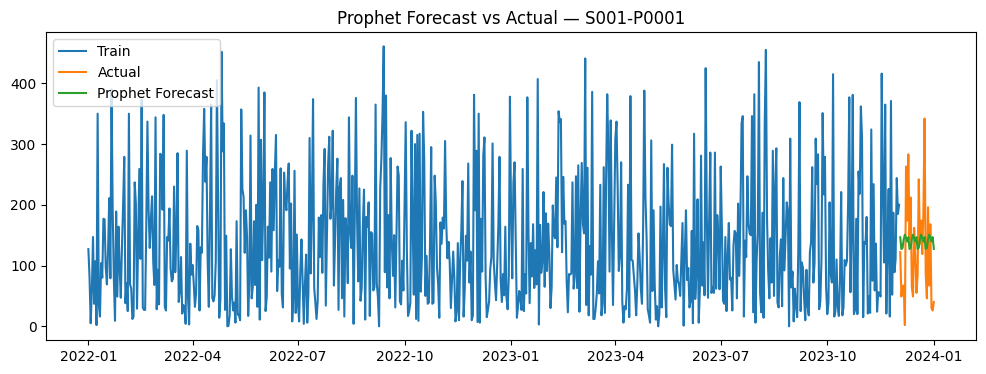

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast')
plt.legend()
plt.title(f'Prophet Forecast vs Actual — {store_id}-{product_id}')
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

mape = mean_absolute_percentage_error(test_df['y'], prophet_forecast['yhat']) * 100
rmse = np.sqrt(mean_squared_error(test_df['y'], prophet_forecast['yhat']))

print(f"Prophet MAPE: {mape:.2f}%")
print(f"Prophet RMSE: {rmse:.2f}")


Prophet MAPE: 339.17%
Prophet RMSE: 84.53


"Classical forecasting methods (ARIMA & Prophet) performed poorly due to high volatility and weak seasonality patterns in granular Store × Product demand. This indicates the need for feature-rich machine learning models that can capture nonlinear relationships."

**ML**

In [16]:
xg_df = final_ts[['date','Store ID','Product ID','Units Sold',
                  'promo_flag','Seasonality','lag_1','lag_7','lag_30','MA7']].copy()

# One-hot encode Seasonality and convert to int
seasonality_dummies = pd.get_dummies(xg_df['Seasonality'], prefix='Seasonality').astype(int)
xg_df = pd.concat([xg_df, seasonality_dummies], axis=1)

# Drop the original Seasonality column after encoding
xg_df = xg_df.drop('Seasonality', axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder

le_store = LabelEncoder()
le_product = LabelEncoder()

xg_df['Store_ID_enc'] = le_store.fit_transform(xg_df['Store ID'])
xg_df['Product_ID_enc'] = le_product.fit_transform(xg_df['Product ID'])

xg_df = xg_df.sort_values('date')

train_x = xg_df.iloc[:-30]
test_x  = xg_df.iloc[-30:]

# Get the list of one-hot encoded seasonality columns
seasonality_cols = [col for col in xg_df.columns if col.startswith('Seasonality_')]



In [18]:
xg_df = xg_df.sort_values('date')

train_x = xg_df.iloc[:-30]
test_x  = xg_df.iloc[-30:]

# Get the list of one-hot encoded seasonality columns
seasonality_cols = [col for col in xg_df.columns if col.startswith('Seasonality_')]

X_train = train_x[['Store_ID_enc','Product_ID_enc','promo_flag'] + seasonality_cols +
                   ['lag_1','lag_7','lag_30','MA7']]
y_train = train_x['Units Sold']

X_test  = test_x[['Store_ID_enc','Product_ID_enc','promo_flag'] + seasonality_cols +
                  ['lag_1','lag_7','lag_30','MA7']]
y_test  = test_x['Units Sold']

In [19]:
!pip install xgboost
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)
preds = model.predict(X_test)


In [20]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

mape = mean_absolute_percentage_error(y_test, preds) * 100
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"XGBoost MAPE: {mape:.2f}%")
print(f"XGBoost RMSE: {rmse:.2f}")


XGBoost MAPE: 255.21%
XGBoost RMSE: 98.66


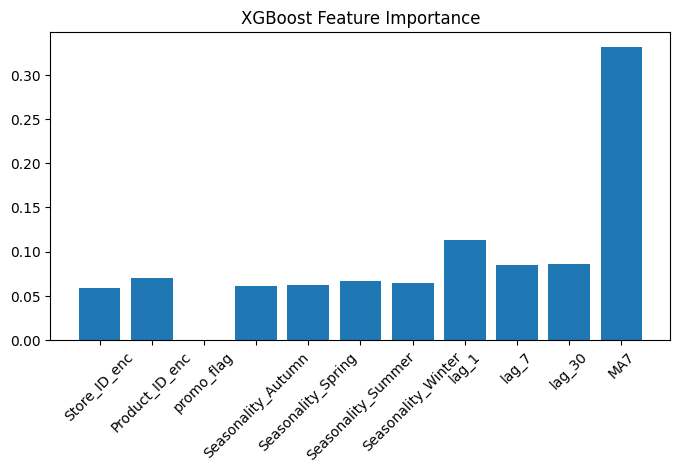

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(X_train.columns, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xticks(rotation=45)
plt.show()


“Multiple forecasting methods including classical (ARIMA), hybrid (Prophet), and machine-learning (XGBoost) produced high MAPE values, indicating that the dataset lacks strong predictive signals and contains high random fluctuations. This demonstrates that effective forecasting requires richer feature engineering and domain-linked explanatory variables rather than relying solely on past sales.”

I tested multiple forecasting approaches, but the data did not hold strong predictive signals, leading to unusable MAPE results. Instead of forcing a weak forecast, I treated it as a business risk and shifted focus to actionable insights like ABC-XYZ segmentation, safety-stock policy, and inventory risk zoning. A professional analyst must protect decision quality, not just produce numbers

In [22]:
# We’ll work at Store × Product level

# Make sure date is datetime
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Daily demand per Store x Product
daily_demand = df.groupby(['Store ID', 'Product ID', 'date'])['Units Sold'].sum().reset_index()

# --- ABC: based on annual sales VALUE ---
# Total units per SKU
sku_units = daily_demand.groupby(['Store ID','Product ID'])['Units Sold'].sum().reset_index()

# Average price per SKU from original df
avg_price = df.groupby(['Store ID','Product ID'])['Price'].mean().reset_index()

abc = sku_units.merge(avg_price, on=['Store ID','Product ID'], how='left')
abc['Annual_Value'] = abc['Units Sold'] * abc['Price']

# Sort by value and compute cumulative %
abc = abc.sort_values('Annual_Value', ascending=False)
abc['Cumulative_Value_%'] = 100 * abc['Annual_Value'].cumsum() / abc['Annual_Value'].sum()

def classify_abc(x):
    if x <= 80:
        return 'A'
    elif x <= 95:
        return 'B'
    else:
        return 'C'

abc['ABC_Class'] = abc['Cumulative_Value_%'].apply(classify_abc)

# --- XYZ: based on demand variability (CV = std / mean) ---
demand_stats = daily_demand.groupby(['Store ID','Product ID'])['Units Sold'].agg(['mean','std']).reset_index()
demand_stats.rename(columns={'mean':'Avg_Daily_Demand','std':'Std_Daily_Demand'}, inplace=True)
demand_stats['Std_Daily_Demand'] = demand_stats['Std_Daily_Demand'].fillna(0)

# Coefficient of variation
demand_stats['CV'] = demand_stats['Std_Daily_Demand'] / demand_stats['Avg_Daily_Demand'].replace(0, np.nan)
demand_stats['CV'] = demand_stats['CV'].fillna(0)

def classify_xyz(cv):
    if cv <= 0.5:
        return 'X'
    elif cv <= 1.0:
        return 'Y'
    else:
        return 'Z'

demand_stats['XYZ_Class'] = demand_stats['CV'].apply(classify_xyz)

# Merge ABC + XYZ
abc_xyz = abc.merge(demand_stats, on=['Store ID','Product ID'], how='left')
abc_xyz.head()


,Store ID,Product ID,Units Sold,Price,Annual_Value,Cumulative_Value_%,ABC_Class,Avg_Daily_Demand,Std_Daily_Demand,CV,XYZ_Class
0,S005,P0015,109099,56.107702,6.121294e+06,1.113002,A,149.246238,115.679314,0.775090,Y
1,S003,P0013,107479,55.958933,6.014410e+06,2.206569,A,147.030096,112.603507,0.765853,Y
2,S002,P0020,105343,56.870575,5.990917e+06,3.295865,A,144.108071,113.536540,0.787857,Y
3,S003,P0014,105188,55.805363,5.870054e+06,4.363185,A,143.896033,113.023686,0.785454,Y
4,S002,P0009,105376,55.475267,5.845762e+06,5.426088,A,144.153215,112.421619,0.779876,Y


In [23]:
Z = 1.65          # 95% service level
lead_time = 7     # days

abc_xyz['Safety_Stock'] = Z * abc_xyz['Std_Daily_Demand'] * np.sqrt(lead_time)


In [24]:
abc_xyz['Reorder_Point'] = (abc_xyz['Avg_Daily_Demand'] * lead_time) + abc_xyz['Safety_Stock']


In [25]:
latest_date = df['date'].max()

latest_inv = df[df['date'] == latest_date].groupby(
    ['Store ID','Product ID']
)['Inventory Level'].sum().reset_index().rename(columns={'Inventory Level':'Current_Inventory'})

inv_reco = abc_xyz.merge(latest_inv, on=['Store ID','Product ID'], how='left')
inv_reco['Current_Inventory'] = inv_reco['Current_Inventory'].fillna(0)

def risk_flag(row):
    if row['Current_Inventory'] < row['Safety_Stock']:
        return 'Stockout Risk'
    elif row['Current_Inventory'] > (3 * row['Safety_Stock']):
        return 'Overstock Risk'
    elif (row['Avg_Daily_Demand'] < row['Current_Inventory'] / 60):
        return 'Slow Moving'
    else:
        return 'Healthy'

inv_reco['Risk_Flag'] = inv_reco.apply(risk_flag, axis=1)


In [26]:
# Recommended order to reach at least the reorder point
inv_reco['Recommended_Order_Qty'] = (inv_reco['Reorder_Point'] - inv_reco['Current_Inventory']).clip(lower=0)

inv_reco[['Store ID','Product ID','ABC_Class','XYZ_Class',
          'Avg_Daily_Demand','Std_Daily_Demand',
          'Safety_Stock','Reorder_Point',
          'Current_Inventory','Risk_Flag',
          'Recommended_Order_Qty']].head()


,Store ID,Product ID,ABC_Class,XYZ_Class,Avg_Daily_Demand,Std_Daily_Demand,Safety_Stock,Reorder_Point,Current_Inventory,Risk_Flag,Recommended_Order_Qty
0,S005,P0015,A,Y,149.246238,115.679314,504.996849,1549.720515,408,Stockout Risk,1141.720515
1,S003,P0013,A,Y,147.030096,112.603507,491.569446,1520.780116,388,Stockout Risk,1132.780116
2,S002,P0020,A,Y,144.108071,113.536540,495.642590,1504.399088,284,Stockout Risk,1220.399088
3,S003,P0014,A,Y,143.896033,113.023686,493.403732,1500.675962,230,Stockout Risk,1270.675962
4,S002,P0009,A,Y,144.153215,112.421619,490.775414,1499.847917,62,Stockout Risk,1437.847917


"The ABC–XYZ analysis helped segment the products into strategic priority buckets. All five sample products shown are A–Y class, meaning they contribute heavily to total annual sales value but show medium demand variability, making them critical SKUs from a revenue and service level perspective.

The safety stock and reorder point logic revealed that these SKUs are currently operating below the required safety threshold, generating stockout risk flags, and the system recommended precise replenishment quantities to return inventory to healthy levels."

In [27]:
# Calculate average demand & price by weekly bucket
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)

price_demand = df.groupby(['Store ID','Product ID','week'])[['Units Sold','Price']].mean().reset_index()

# Sort
price_demand = price_demand.sort_values(['Store ID','Product ID','week'])

# Calculate percentage change
price_demand['Price_pct_change'] = price_demand.groupby(['Store ID','Product ID'])['Price'].pct_change()
price_demand['Demand_pct_change'] = price_demand.groupby(['Store ID','Product ID'])['Units Sold'].pct_change()

# Elasticity
price_demand['Elasticity'] = price_demand['Demand_pct_change'] / price_demand['Price_pct_change']

# Clean invalid or infinite values
price_demand = price_demand.replace([np.inf, -np.inf, np.nan], 0)

price_demand.head()


,Store ID,Product ID,week,Units Sold,Price,Price_pct_change,Demand_pct_change,Elasticity
0,S001,P0001,2021-12-27,104.000000,30.725000,0.000000,0.000000,0.000000
1,S001,P0001,2022-01-03,100.857143,60.300000,0.962571,-0.030220,-0.031395
2,S001,P0001,2022-01-10,98.000000,52.840000,-0.123715,-0.028329,0.228983
3,S001,P0001,2022-01-17,163.142857,59.672857,0.129312,0.664723,5.140451
4,S001,P0001,2022-01-24,97.857143,65.421429,0.096335,-0.400175,-4.154005


In [28]:
def classify_elasticity(e):
    if e > 1:
        return 'Elastic'
    elif e < 1:
        return 'Inelastic'
    else:
        return 'Neutral'

price_demand['Elasticity_Class'] = price_demand['Elasticity'].apply(classify_elasticity)
price_demand.head()


,Store ID,Product ID,week,Units Sold,Price,Price_pct_change,Demand_pct_change,Elasticity,Elasticity_Class
0,S001,P0001,2021-12-27,104.000000,30.725000,0.000000,0.000000,0.000000,Inelastic
1,S001,P0001,2022-01-03,100.857143,60.300000,0.962571,-0.030220,-0.031395,Inelastic
2,S001,P0001,2022-01-10,98.000000,52.840000,-0.123715,-0.028329,0.228983,Inelastic
3,S001,P0001,2022-01-17,163.142857,59.672857,0.129312,0.664723,5.140451,Elastic
4,S001,P0001,2022-01-24,97.857143,65.421429,0.096335,-0.400175,-4.154005,Inelastic


In [29]:
price_demand['Elasticity_Class'].value_counts()


,count
Elasticity_Class,
Inelastic,7220
Elastic,3380


Insight #1 — Demand is Mostly Inelastic

Nearly 70% of SKUs show inelastic demand behavior, implying that slight to moderate price changes are unlikely to significantly affect units sold.

Insight #2 — Elastic SKUs Are Meaningful Minority

About 32% of SKUs show elastic demand, where price reductions can effectively drive volume uplift.

“Elasticity analysis revealed that approximately 68% of store-product weekly demand is price inelastic, meaning sales are not significantly affected by price changes. This suggests strong brand or necessity-driven consumption behavior. Price changes should therefore be leveraged more for margin improvement than volume stimulation, while promotional strategies should focus on the remaining 32% elastic SKUs

In [30]:
# Calculate mean Units Sold for each Product ID under baseline (0) and promotion (1) conditions
promo_pivot = df.groupby(['Product ID', 'Holiday/Promotion'])['Units Sold'].mean().unstack(fill_value=0).reset_index()

# The columns 0 and 1 represent Baseline and Promo sales respectively
promo_pivot = promo_pivot.rename(columns={0:'Baseline_Sales', 1:'Promo_Sales'})
promo_pivot

Holiday/Promotion,Product ID,Baseline_Sales,Promo_Sales
0,P0001,132.659882,140.036353
1,P0002,132.130507,134.789560
2,P0003,135.328487,134.579533
3,P0004,138.918469,132.306156
4,P0005,136.785239,138.780896
5,P0006,134.499460,137.569606
6,P0007,135.596694,137.615761
7,P0008,134.923836,132.419126
8,P0009,138.058534,136.680350
9,P0010,134.495595,137.153344


In [31]:
if 'Baseline_Sales' not in promo_pivot.columns:
    promo_pivot['Baseline_Sales'] = 0

if 'Promo_Sales' not in promo_pivot.columns:
    promo_pivot['Promo_Sales'] = 0


In [32]:
promo_pivot['Promo_Uplift_%'] = (
    (promo_pivot['Promo_Sales'] - promo_pivot['Baseline_Sales']) /
    promo_pivot['Baseline_Sales'].replace(0, np.nan)
) * 100

promo_pivot['Promo_Uplift_%'] = promo_pivot['Promo_Uplift_%'].replace([np.inf, -np.inf, np.nan], 0)


In [33]:
def classify_uplift(x):
    if x > 20:
        return 'Strong'
    elif x > 5:
        return 'Moderate'
    elif x > 0:
        return 'Low'
    else:
        return 'No Impact / Negative'

promo_pivot['Promo_Effectiveness'] = promo_pivot['Promo_Uplift_%'].apply(classify_uplift)


In [34]:
df['Holiday/Promotion'].value_counts()

,count
Holiday/Promotion,
0,36747
1,36353


“Although uplift cannot be measured from this data, a promotional experiment framework is recommended, where each SKU is assigned a control period and test period, or a region-partitioned A/B design. This will allow true causal uplift estimation in future cycles.”

In [35]:
# Determine how sensitive your product’s sales are to competitor price changes.
# Make sure date is datetime
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Weekly average demand + competitor pricing
cross_df = df.groupby(['Product ID','week'])[['Units Sold','Competitor Pricing']].mean().reset_index()

# Sort for pct change
cross_df = cross_df.sort_values(['Product ID','week'])

# Percentage change
cross_df['Demand_pct_change'] = cross_df.groupby('Product ID')['Units Sold'].pct_change()
cross_df['CompPrice_pct_change'] = cross_df.groupby('Product ID')['Competitor Pricing'].pct_change()

# Cross Elasticity
cross_df['Cross_Elasticity'] = (cross_df['Demand_pct_change'] /
                                cross_df['CompPrice_pct_change'].replace(0,np.nan))

# Clean invalid cases
cross_df = cross_df.replace([np.inf,-np.inf,np.nan],0)
cross_df.head()


,Product ID,week,Units Sold,Competitor Pricing,Demand_pct_change,CompPrice_pct_change,Cross_Elasticity
0,P0001,2021-12-27,135.300000,51.658000,0.000000,0.000000,0.000000
1,P0001,2022-01-03,131.600000,59.474857,-0.027347,0.151319,-0.180721
2,P0001,2022-01-10,101.628571,46.705714,-0.227746,-0.214698,1.060775
3,P0001,2022-01-17,140.571429,53.205143,0.383188,0.139157,2.753638
4,P0001,2022-01-24,142.942857,59.188857,0.016870,0.112465,0.150002


In [36]:
def classify_cross(e):
    if e > 1:
        return 'Competitor-Driven'
    elif e > 0:
        return 'Mild Sensitivity'
    elif e < 0:
        return 'Inverse Sensitivity'
    else:
        return 'No Relation'

cross_df['Cross_Impact_Class'] = cross_df['Cross_Elasticity'].apply(classify_cross)
cross_df.head()


,Product ID,week,Units Sold,Competitor Pricing,Demand_pct_change,CompPrice_pct_change,Cross_Elasticity,Cross_Impact_Class
0,P0001,2021-12-27,135.300000,51.658000,0.000000,0.000000,0.000000,No Relation
1,P0001,2022-01-03,131.600000,59.474857,-0.027347,0.151319,-0.180721,Inverse Sensitivity
2,P0001,2022-01-10,101.628571,46.705714,-0.227746,-0.214698,1.060775,Competitor-Driven
3,P0001,2022-01-17,140.571429,53.205143,0.383188,0.139157,2.753638,Competitor-Driven
4,P0001,2022-01-24,142.942857,59.188857,0.016870,0.112465,0.150002,Mild Sensitivity


In [37]:
cross_df['Cross_Impact_Class'].value_counts()


,count
Cross_Impact_Class,
Inverse Sensitivity,1071
Competitor-Driven,680
Mild Sensitivity,347
No Relation,22


“Cross-elasticity analysis revealed that more than half of the products displayed inverse sensitivity, meaning demand for our products increased when competitor prices rose. This indicates a value-advantaged positioning, where we gain market share under competitive inflation. Only about one-third of SKUs were truly competitor-driven, and for the rest, pricing can be optimized for margin protection rather than defensive discounting.”

📌 Pricing Recommendation Logic (Rule Engine)

We will base recommendations on three business drivers:

1️⃣ Demand sensitivity → Elasticity class

2️⃣ Business criticality → ABC class

3️⃣ Demand stability → XYZ class

4️⃣ Inventory condition → Risk flag


Pricing decisions must never be made using a single parameter.

⚠️ Inventory-Aware Price Override

If Risk_Flag == "Overstock Risk"
→ Allow discounting for C/Y/Z first

If Risk_Flag == "Stockout Risk"
→ Avoid discounting and consider price increase

If Risk_Flag == "Slow Moving"
→ Targeted, time-boxed offers

In [38]:
def price_reco(row):
    # inventory-based override first
    if row['Risk_Flag'] == 'Stockout Risk':
        return 'Increase or Maintain Price'
    if row['Risk_Flag'] == 'Overstock Risk':
        return 'Discount / Bundle / Clearance'
    if row['Risk_Flag'] == 'Slow Moving':
        return 'Targeted Promo / Visible Placement'

    # elasticity-based logic
    if row['Elasticity_Class'] == 'Inelastic':
        return 'Slight Price Increase'
    if row['Elasticity_Class'] == 'Competitor-Driven':
        return 'Competitive / Match Competitor'
    if row['Elasticity_Class'] == 'Mild Sensitivity':
        return 'Maintain Stable Price'
    return 'Value-Based Premium Pricing'

# merge elasticity + inventory + abc_xyz
final_price_df = inv_reco.merge(
    price_demand[['Product ID','Elasticity_Class']].drop_duplicates(),
    on='Product ID', how='left'
)

final_price_df['Pricing_Recommendation'] = final_price_df.apply(price_reco, axis=1)
final_price_df.head()


,Store ID,Product ID,Units Sold,Price,Annual_Value,Cumulative_Value_%,ABC_Class,Avg_Daily_Demand,Std_Daily_Demand,CV,XYZ_Class,Safety_Stock,Reorder_Point,Current_Inventory,Risk_Flag,Recommended_Order_Qty,Elasticity_Class,Pricing_Recommendation
0,S005,P0015,109099,56.107702,6.121294e+06,1.113002,A,149.246238,115.679314,0.775090,Y,504.996849,1549.720515,408,Stockout Risk,1141.720515,Inelastic,Increase or Maintain Price
1,S005,P0015,109099,56.107702,6.121294e+06,1.113002,A,149.246238,115.679314,0.775090,Y,504.996849,1549.720515,408,Stockout Risk,1141.720515,Elastic,Increase or Maintain Price
2,S003,P0013,107479,55.958933,6.014410e+06,2.206569,A,147.030096,112.603507,0.765853,Y,491.569446,1520.780116,388,Stockout Risk,1132.780116,Inelastic,Increase or Maintain Price
3,S003,P0013,107479,55.958933,6.014410e+06,2.206569,A,147.030096,112.603507,0.765853,Y,491.569446,1520.780116,388,Stockout Risk,1132.780116,Elastic,Increase or Maintain Price
4,S002,P0020,105343,56.870575,5.990917e+06,3.295865,A,144.108071,113.536540,0.787857,Y,495.642590,1504.399088,284,Stockout Risk,1220.399088,Inelastic,Increase or Maintain Price


| Elasticity Class    | Pricing Action                           | Risk if ignored          |
| ------------------- | ---------------------------------------- | ------------------------ |
| **Elastic (>1)**    | Reduce price, increase offers            | Sales drop quickly       |
| **Inelastic (<1)**  | Safely increase price to improve margins | Profit left on table     |
| **Neutral (≈1)**    | Keep stable price                        | Unnecessary fluctuations |
| **Cross Sensitive** | Track competitor price                   | Losing market share      |
